In [1]:
import ROOT
from ROOT import *
import numpy as np
from scipy.spatial.transform import Rotation
import ctypes
from constants import *
from tqdm import trange
from array import array

%load_ext autoreload

Welcome to JupyROOT 6.22/06


In [2]:
from generator import *
%autoreload 2
ROOT.gRandom.SetSeed(0)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetMarkerStyle(kPlus)
rng = ROOT.TRandom3()
gen = Generator("../data/ibd/ibdxscnDoubleDiff.txt")

## Preprocess time step info


In [3]:
lightcurve_path = "../data/kato_snowglobes_event_rate/lightcurve_nue_all.dat"
lightcurve = np.loadtxt(lightcurve_path)
timestep = np.zeros([lightcurve.shape[0], 2])
for i in range(lightcurve.shape[0]):
    line = lightcurve[i]
    timestep[i, 0] = line[3]
    timestep[i, 1] = line[0]


1112.6576097196537


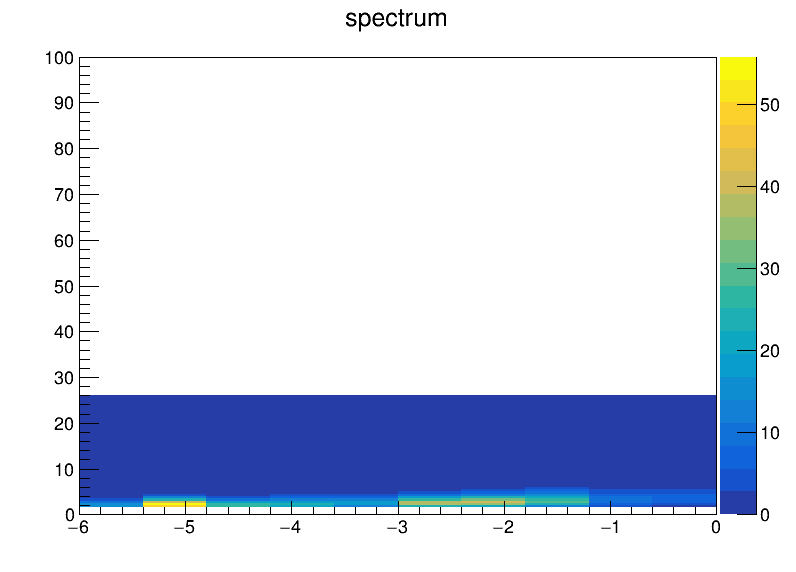

In [4]:
spectrum = TH2F("spectrum", "spectrum", 10, -6, 0, 200, 0, 100);

for step in timestep:
    step_name = int(step[0])
    time = -np.log10(step[1])
    #print(time)
    path = "../data/kato_snowglobes_event_rate/normal/kato15sol{:d}_normal_smeared_sum_ibd.dat".format(step_name)
    spe_file = np.loadtxt(path)
    for line in spe_file:
        en = line[0] * 1000 # convert to MeV
        spectrum.Fill(time, en, line[1])
    
print(spectrum.Integral())    
c1 = TCanvas("c1", "c1", 800, 600)
spectrum.GetXaxis().SetRangeUser(-1e-6, -1e1)
spectrum.Draw('colz')
c1.Draw()



TH1.Print Name  = spectrum, Entries= 7600, Total sum= 1112.66


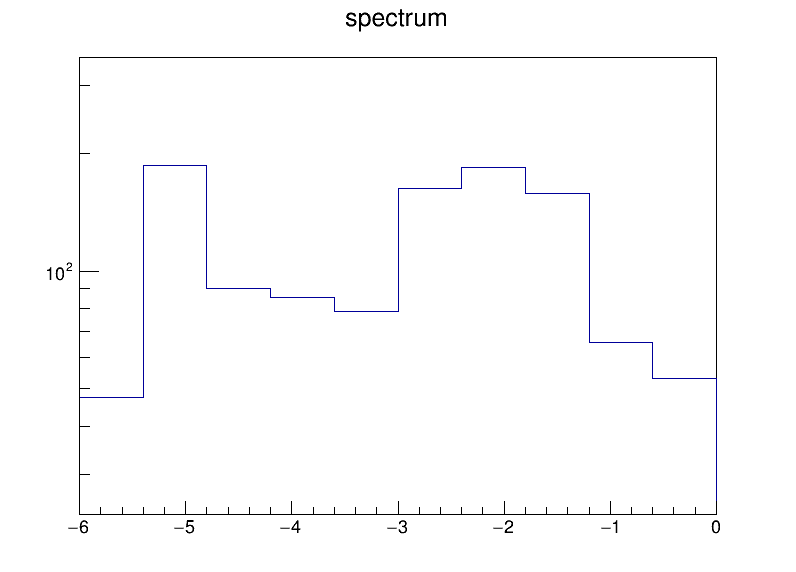

In [5]:
spectrum.Print()
proj = spectrum.ProjectionX()
proj.Draw("hist")
c1.SetLogy()
c1.Draw()

In [33]:
path = "../data/kato_snowglobes_event_rate/inverse/kato15sol7225_inverted_smeared_sum_ibd.dat"
spectrum = TH1F("spectrum", "Spectrum", 200, 0, 100)
spe_file = np.loadtxt(path, delimiter=" ")
for line in spe_file:
    en = line[0] * 1000 # convert to MeV
    spectrum.Fill(en, line[1])
    
print(spectrum.Integral())
#c1.Draw()

0.027964721336835505


Warning in <TROOT::Append>: Replacing existing TH1: spectrum (Potential memory leak).


In [5]:
tArray

array('d', [-321840.0, -318000.0, -78712.0, -72814.0, -46361.0, -37633.0, -30425.0, -19630.0, -15730.0, -12603.0, -10139.0, -5223.0, -4275.4, -3538.6, -2044.6, -1823.1, -1709.2, -999.59, -798.97, -640.88, -400.35, -283.36, -195.52, -158.84, -128.13, -104.14, -56.859, -39.796, -23.338, -16.625, -9.807, -6.8022, -3.8267, -2.505, -1.1739, -0.5896, -0.13197, -0.013179])